In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
import pickle
from flask import Flask, request, jsonify

In [2]:
file_path = "C:/Users/ayush/Downloads/hotel_bookings.csv"
df = pd.read_csv(file_path)

In [3]:
df.dropna(inplace=True) 
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d', errors='coerce')
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), errors='coerce')

In [4]:
df['revenue'] = df['adr'] * df['stays_in_weekend_nights'] + df['stays_in_week_nights']
revenue_trends = df.groupby(df['arrival_date'].dt.to_period("M"))['revenue'].sum()

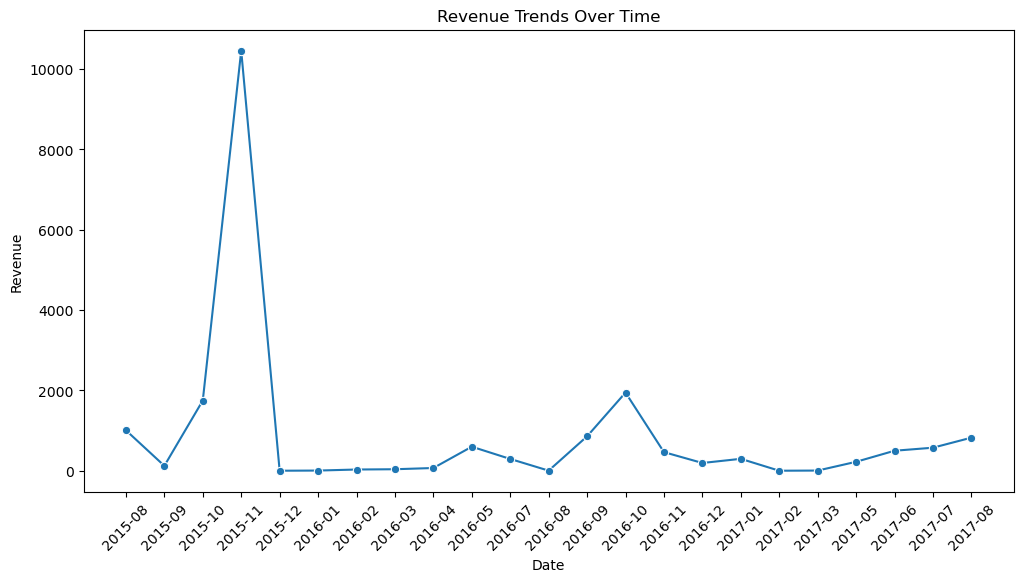

In [5]:
revenue_trends.index = revenue_trends.index.astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_trends.index, y=revenue_trends.values, marker='o')
plt.title("Revenue Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [6]:
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 7.83%


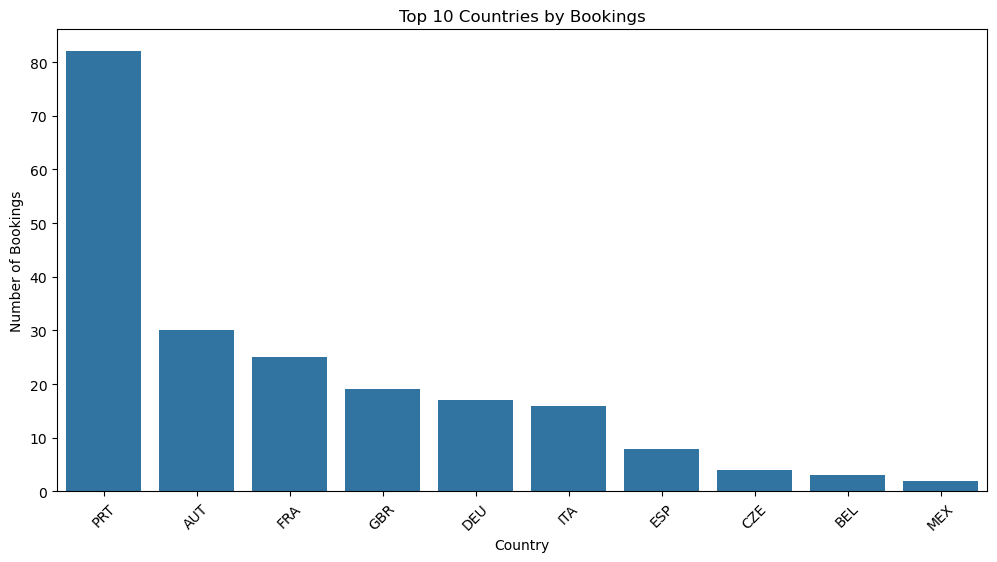

In [7]:
country_counts = df['country'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Bookings")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.show()

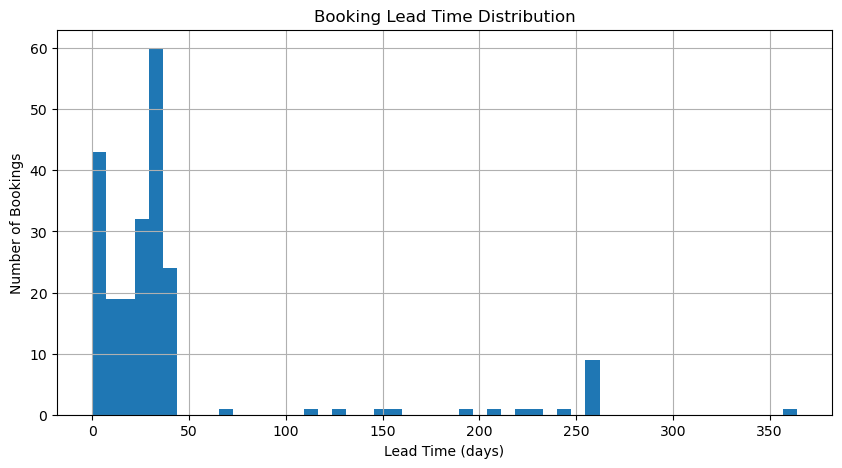

In [8]:
df['lead_time'].hist(bins=50, figsize=(10, 5))
plt.title("Booking Lead Time Distribution")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.show()

In [9]:
df.to_csv("C:/Users/ayush/Desktop/New folder/cleaned_hotel_bookings.csv", index=False)
print("Cleaned data successfully")

Cleaned data successfully


In [10]:
model = SentenceTransformer('all-MiniLM-L6-v2')
df['text'] = df.apply(lambda row: f"Booking from {row['country']} on {row['arrival_date']} with revenue {row['revenue']}", axis=1)
embeddings = model.encode(df['text'].tolist(), convert_to_numpy=True)

In [11]:
d, n = embeddings.shape
index = faiss.IndexFlatL2(n)
index.add(embeddings)

In [14]:
faiss.write_index(index, "C:/Users/ayush/Desktop/New folder/faiss_index.bin")
pickle.dump(df, open("C:/Users/ayush/Desktop/New folder/df.pkl", "wb"))

print("FAISS Index saved successfully")

FAISS Index saved successfully
